#**PROYEK PERTAMA MACHINE LEARNING TERAPAN**
##"Prediksi Biaya Asuransi Kesehatan"

Oleh: 
Anak Agung Sinta Trisnajayanti, 
sintatrisnajayanti@gmail.com, 
Universitas Udayana.

In [33]:
!pip install opendatasets

In [34]:
#['KAGGLE_USERNAME'] = "sintatrisnajayanti"
#['KAGGLE_KEY'] = "0a12e4877af667d478f839c01940227e"
import opendatasets as od

dataset_url= 'https://www.kaggle.com/noordeen/insurance-premium-prediction'
od.download('https://www.kaggle.com/noordeen/insurance-premium-prediction')

Skipping, found downloaded files in "./insurance-premium-prediction" (use force=True to force download)


Menggunakan opendatasets untuk mengambil data dari kaggle

#**Import Data**
Import library yang digunakan

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian mengambil dan membaca dataset dengan pd.read.csv

In [36]:
data_asuransi = pd.read_csv('/content/insurance-premium-prediction/insurance.csv')
data_asuransi.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Untuk melihat jumlah data pada dataset

In [37]:
data_asuransi.shape

(1338, 7)

#**Data Information**

*  age: Usia dari Nasabah 
*  sex: Jenis kelamin dari nasabah
      * female: Perempuan
      * male : Laki- Laki 
*   bmi: Indeks massa tubuh dari nasabah. Memberikan pemahaman tentang tubuh, bobot yang relatif tinggi atau rendah
*   children: Jumlah anak yang ditanggung oleh asuransi kesehatan  (jumlah tanggungan
*   smoker: apakah nasabah perokok atau tidak
      * yes: perokok
      * no: tidak perokok
*   region: Daerah perumahan dari nasabah
      * southeast: Tenggara
      * southwest: Barat daya
      * northwest: Barat laut
      * northeast: Timur laut
*	expenses: biaya yang dibayarkan nasabah ke perusahaan asuransi



Mengecek nilai null dan melihat tipe datanya. Dimana jumlah fitur numerik adalah 4 dan fitur kategorikal adalah 3

In [38]:
data_asuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Untuk mengecek data atau informasi statik dan melihat apakah terdapat nilai 0

In [39]:
data_asuransi.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Setelah melihat pada tabel ternyata terdapat nilai 0 pada fitur atau kolom children. Akan tetapi nilai 0 pada children tidak merupakan missing value karena kemungkinan nasabah memang tidak memiliki anak. Maka dari itu kita hanya melihat berapa jumlah data bernilai 0 pada kolom children dan tidak melakukan drop kolom

In [40]:
children = (data_asuransi.children == 0).sum()
 
print("Nilai 0 di kolom children ada: ", children)

Nilai 0 di kolom children ada:  574


In [41]:
data_asuransi.loc[(data_asuransi['children']==0)]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
9,60,female,25.8,0,no,northwest,28923.14
...,...,...,...,...,...,...,...
1331,23,female,33.4,0,no,southwest,10795.94
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Disini bisa dilihat jumlah dari data masih sama seperti awal

In [42]:
data_asuransi.shape

(1338, 7)

#**Data Analysis**
Sekarang memisahkan fitur numerik dan fitur kategorikal

In [43]:
numerical_features = ['age', 'bmi', 'children', 'expenses']
categorical_features = ['sex', 'smoker', 'region']

Mengecek outlier fitur numerik menggunakan boxplot

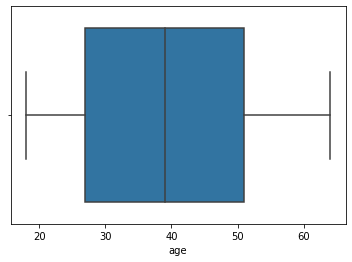

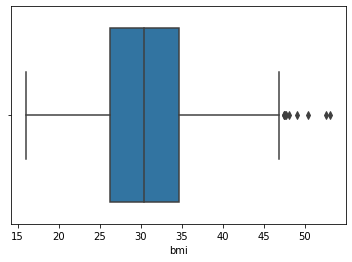

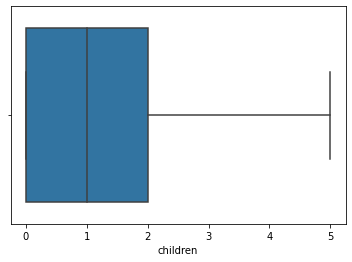

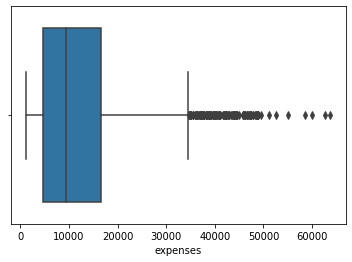

In [44]:
for col in numerical_features :
  sns.boxplot(x=data_asuransi[col])
  plt.show()

Pada fitur numerikal diatas terdapat beberapa outliers. Sekarang kita gunakan IQR method untuk mengatasi hal tersebut

In [45]:
Q1 = data_asuransi.quantile(0.20)
Q3 = data_asuransi.quantile(0.80)
IQR=Q3-Q1
data_asuransi=data_asuransi[~((data_asuransi<(Q1-1.5*IQR))|(data_asuransi>(Q3+1.5*IQR))).any(axis=1)]

data_asuransi.shape

(1298, 7)

In [46]:
data_asuransi.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Sekarang kita analisis data pada fitur kategorikal (Univariate) menggunakan countplot

        jumlah sampel  persentase
male              652        50.2
female            646        49.8


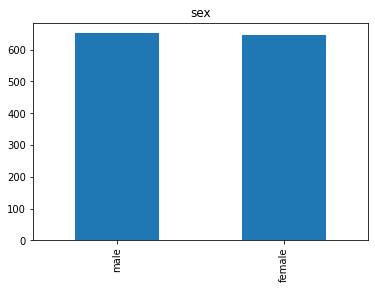

In [47]:
feature = categorical_features[0]
count = data_asuransi[feature].value_counts()
percent = 100*data_asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Gambar diatas menunjukkan persentase perempuan dan laki- laki sama pada data nasabah

     jumlah sampel  persentase
no            1063        81.9
yes            235        18.1


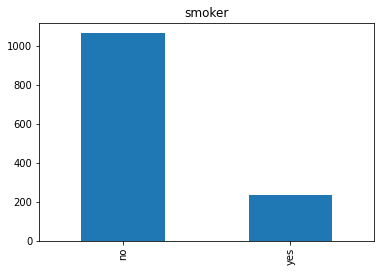

In [48]:
feature = categorical_features[1]
count = data_asuransi[feature].value_counts()
percent = 100*data_asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kemudian persentase dari jumlah nasabah yang tidak perokok lebih besar 

           jumlah sampel  persentase
southeast            346        26.7
northwest            318        24.5
northeast            318        24.5
southwest            316        24.3


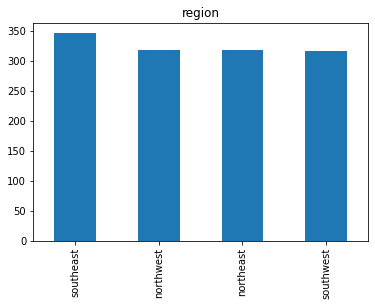

In [49]:
feature = categorical_features[2]
count = data_asuransi[feature].value_counts()
percent = 100*data_asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Disini juga dapat dilihat yang mendominasi untuk daerah yaitu southeast 

Untuk melihat visualisasi data dari fitur numerik (Univariate) kali ini menggunakan hist

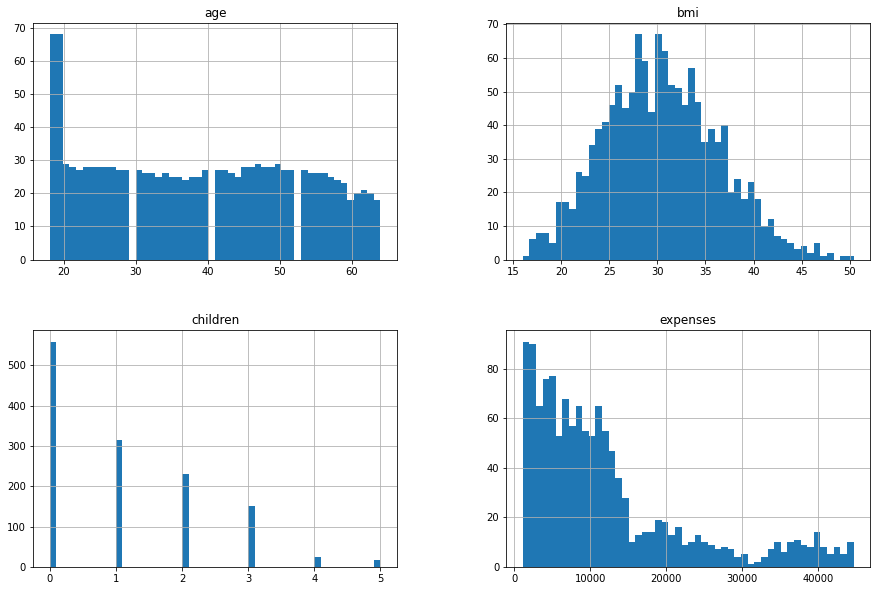

In [50]:
data_asuransi.hist(bins=50, figsize=(15,10))
plt.show()

Melihat hubungan antara semua fitur ditampilkan pada visualisasi data dengan heatmap

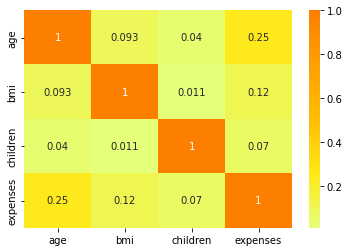

In [51]:
sns.heatmap(data_asuransi.corr(), cmap = 'Wistia', annot= True)

Disini untuk melihat lebih jelas mengenai keterhubungan setiap fiturnya saya menerapkan Multivariate pada fitur numerik dengan hue smoker dan sex untuk membedakan warna sebagai kategorinya

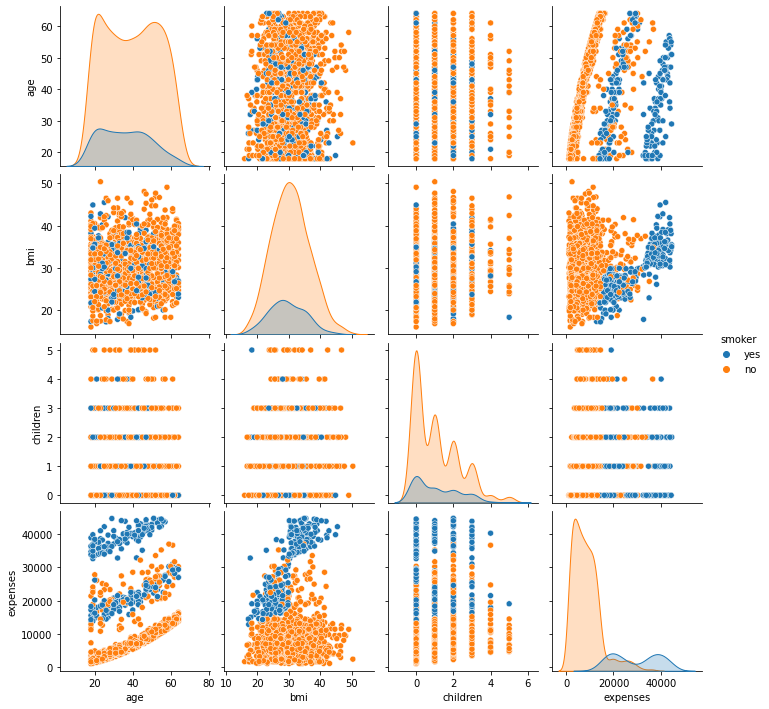

In [52]:
sns.pairplot(data_asuransi,hue='smoker')

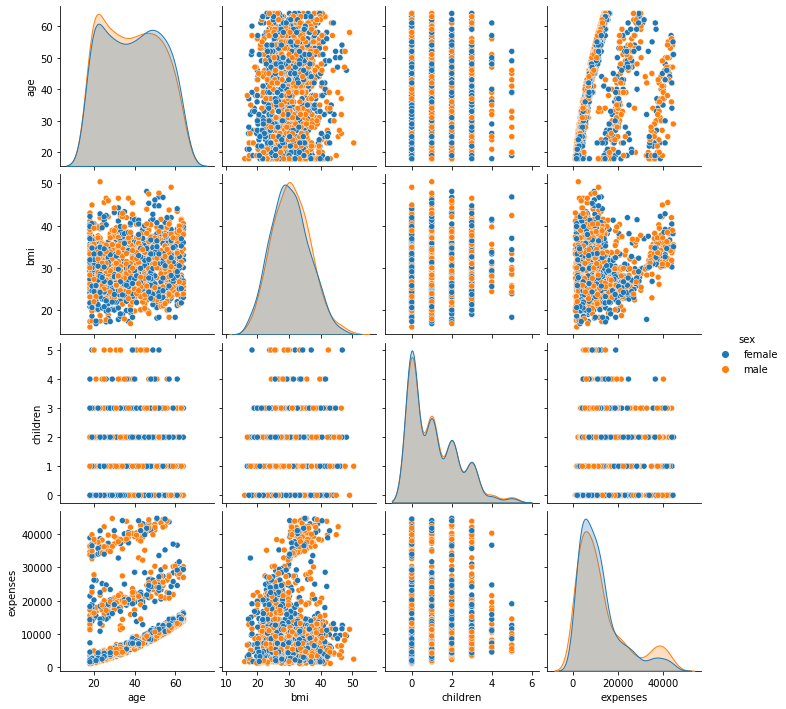

In [53]:
sns.pairplot(data_asuransi,hue='sex')

Dari kedua gambar di atas bisa dilihat bahwa perokok relatif muda yaitu dibawah 30 tahun, nasabah memiliki sedikit anak, biaya asuransi lebih tinggi yang perokok ini memiliki kekuatan dalam prediksi. Kemudian ada hubungan juga antara expenses-bmi, dan expenses-age

Melihat keterhubungan antara expenses-bmi, dan expenses-age menggunakan Implot

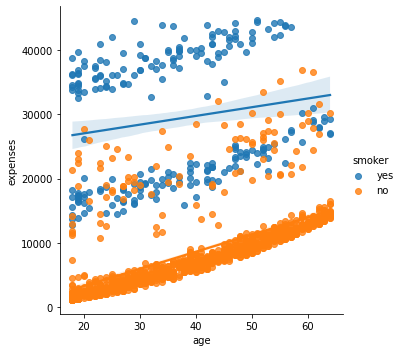

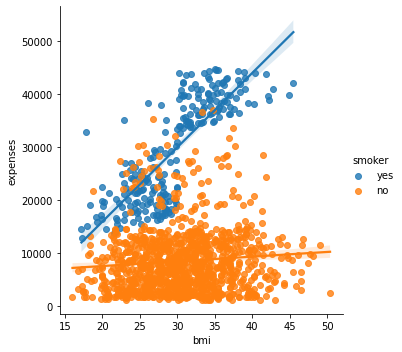

In [54]:
sns.lmplot(x='age', y='expenses', data=data_asuransi, hue='smoker')
sns.lmplot(x='bmi', y='expenses', data=data_asuransi, hue='smoker')

#**Data Preparation**
Pada data preparation ini saya menggunakan One-Hot_Encoding yaitu salah satu metode encoding yang akan merepresentasikan data bertipe kategori menjadi biner yang bernilai integer 0 dan 1

In [55]:
for col in categorical_features:
  data_asuransi = pd.concat([data_asuransi, pd.get_dummies(data_asuransi[col], prefix=col, drop_first=True)],axis=1)
  data_asuransi = data_asuransi.drop(col,axis=1)

data_asuransi

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


Membagi data menjadi data latih dan data uji

In [56]:
from sklearn.model_selection import train_test_split
X = data_asuransi.drop(["expenses"],axis =1)
y = data_asuransi["expenses"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Melakukan standarisasi

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Melihat data X_train

In [58]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,-0.119872,-0.073051,-0.886061,0.976635,-0.481296,-0.546869,-0.595947,1.752464
1,1.692358,1.454070,-0.886061,0.976635,-0.481296,-0.546869,1.678001,-0.570625
2,-0.917252,-0.174859,-0.068094,0.976635,-0.481296,-0.546869,1.678001,-0.570625
3,0.097596,0.435989,-0.068094,0.976635,2.077725,-0.546869,-0.595947,-0.570625
4,0.532531,0.741413,-0.068094,-1.023924,2.077725,-0.546869,-0.595947,1.752464


Melihat data y_train

In [59]:
pd.DataFrame(y_train).head()

,expenses
1104,20420.60
1322,12981.35
977,2902.91
422,39125.33
1218,41661.60


#**Modeling**
Import library

In [60]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error   
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  

Membuat model summary yang nantinya akan digunakan untuk membandingkan model/solusi yang akan digunakan. Dimana Untuk membandingkan ketiga model ini akan dilakukan penghitungan nilai dari Training Accuracy, Testing Accuracy, RMSE Training Data, RMSE Testing Data, dan Accuracy dari prediksi

In [61]:
def model_summary(model, model_name, cvn=20):
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE Testing Data: ", RMSE_model_test)

    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy untuk", cvn,"- Prediksi: ", accuracy_cv_model)

Menjalankan semua model hingga mencapai performa yang baik

In [62]:
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  
model_summary(support_vector_reg, "Support_Vector_Regression")

Support_Vector_Regression
Training Accuracy:  0.6217315119139231
Testing Accuracy:  0.5260770353143359
RMSE Training Data:  6491.299041879336
RMSE Testing Data:  7165.737100127139
Accuracy untuk 20 - Prediksi:  0.5924159327812968


In [63]:
decision_tree_reg = DecisionTreeRegressor(max_depth=3, random_state=5)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8393138280287132
Testing Accuracy:  0.7510883964793631
RMSE Training Data:  4230.783356908776
RMSE Testing Data:  5193.1344309329015
Accuracy untuk 20 - Prediksi:  0.8079735332578944


In [64]:
random_forest_reg = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=5)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.845283317527074
Testing Accuracy:  0.7592552315506385
RMSE Training Data:  4151.452824527471
RMSE Testing Data:  5107.230076429424
Accuracy untuk 20 - Prediksi:  0.8177022945377055


Dari sini kita dapat menyimpulkan bahwa model yang lebih akurat dalam memprediksi harga/biaya asuransi pada proyek ini adalah menggunakan model Random Forest Regression dengan memiliki accuracy prediksi tertinggi yaitu 81% dan nilai RMSE terendah. 